<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Problemas 1.B - Graphs </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino mínimo entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `Graph` como el que habéis implementado en la Práctica 0.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [1]:
import networkx as nx
import random
def dfs(G, origen, destino, depth=0):
    
    pila=[origen]
    visited=[origen]
    prev={}
    expanded=0
    
    for i in G.node:
        prev[i]=None
    
    
    
    while len(pila)!=0:
        
        current=pila.pop(0)
        
        if current==destino:
            return construct_path(prev,destino,origen,expanded)
        
        for i in G.neighbors(current):
            if i not in visited:
                pila.append(i)
                prev[i]=current
        visited.append(current)
        expanded+=1
        
    
    
    
def construct_path(prev,destino,origen,expanded):
    path=[]
    aux=destino
    
    
    while prev[aux]!=origen:
        path.append(aux)
        
        aux=prev[aux]
    path.append(aux)
    path.append(origen)
    
    path.reverse()
    
    return path, expanded

In [2]:

'''
G3=nx.Graph()
G3.add_nodes_from([1,2,3,4,5,6.7])
G3.add_edge(1,2)
G3.add_edge(2,4)
G3.add_edge(4,5)
G3.add_edge(2,3)
G3.add_edge(3,4)
G3.add_edge(3,6)
G3.add_edge(4,6)

dfs(G3,1,6)
'''
G = nx.generators.barabasi_albert_graph(12, 2)
dfs(G, 1, 11)

([1, 2, 11], 6)

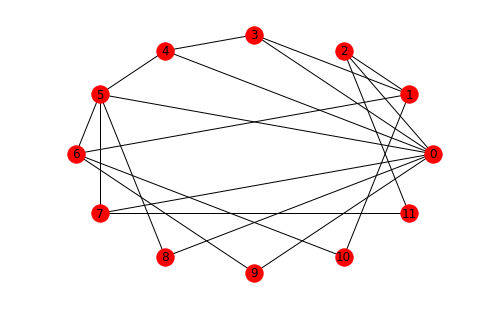

In [3]:
%matplotlib inline

nx.draw_circular((G),with_labels=True)

## Euler Circuit

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Euler Algorithm</p></h2>
  <p>
  Se define como camino euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__DiG__: Objeto de tipo grafo sobre el cual queremos encontrar el camino Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'nodelist'_ __: Un objeto con la lista de nodos ordenados que formarían el camino.</li>
<ul>

</p>

</div>

In [4]:
"""
Un grafo es euleriano si todos los vertices 'u' tienen grado par,
retorna True o False
"""
def isEulerian(G):
    return all(G.degree(u) % 2 == 0 for u in G)

"""
Retorna la lista de vertices 'v' conectados a un vertice 'u'
"""
def edgeList(G, u):
    return [v for v in G.neighbors(u)]

"""
Lo usamos para comprobar que quedan aristas libres desde donde estamos y no estamos atascados,
Retorna False si estamos atascados y True si hay camino
"""
def freeAristas(G, u, aristasVisitadas):
    visited = 0
    for v in aristasVisitadas:
        if u in v:
            visited += 1
    return visited == G.degree(u)

"""
Retorna un camino euleriano e imprime su circuito
"""
def eulerCami(G):
    origen = random.choice(list(G.node)) # porque usa la libreria nx y la lista no esta tal cual
    nAristas = len(G.edges())
    aristasVisitadas = []
    circuit = []
    path = []
    while len(aristasVisitadas) != nAristas:
        destino = random.choice(edgeList(G,origen))
        origenDestino = (min((origen, destino)),max((origen, destino)))
        if freeAristas(G, origen, aristasVisitadas):
            aristasVisitadas.pop()
            circuit.pop()
            path.pop()
            origenDestino = (min((origen, destino)),max((origen, destino)))
            destino = random.choice(edgeList(G,path[-1]))
            origen = path[-2]
        if origenDestino not in aristasVisitadas and origenDestino in G.edges():
            aristasVisitadas.append(origenDestino)
            circuit.append((origen,destino))
            path.append(origen)
            origen = destino
    path.append(path[0])
    
    print("Circuito Euleriano:",circuit)
    return path

"""
Si un grafo es euleriano, busca un camino mientras no lo haya encontrado y lo retorna
"""
def euler(G):
    if isEulerian(G):
        return eulerCami(G)
    else:
        raise Exception("G No es euleriano")

Circuito Euleriano: [(9, 2), (2, 6), (6, 5), (5, 4), (4, 3), (3, 2), (2, 8), (8, 7), (2, 10), (10, 7), (2, 1), (1, 7), (7, 3), (3, 6), (6, 7), (7, 9)]


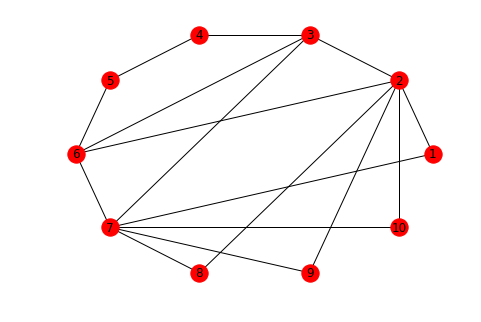

In [5]:
%matplotlib inline

G=nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from(((1,2),(1,7),(2,3),(2,6),(2,10),(2,9),(2,8),(3,4),(3,6),(3,7),(4,5),(5,6),(6,7),(7,8),(7,9),(7,10)))
euler(G)

nx.draw_circular(G, with_labels=True)



<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
Que condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

## Minimum Spanning Tree


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2 - Kruskal Algorithm</p></h2>
  
  <p>
  Un spanning tree es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial y en el cual se computa el peso total de las aristas del grafo. El minimum spanning tree de un grafo es aquel cuyo peso total de las aristas es mínimo respecto a cualquier otro posible arbol.
</p>
<img width="300px" src="img/mst.png">
<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo dirigido. 
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__DiG__: Objeto de tipo `Directed Graph`.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _(tree, cost)_ __: Un objeto grafo que represente el minimum spanning tree y un entero con el peso total del arbol.</li>
<ul>

</p>

</div>

In [6]:
def kruskal():
    return (nx.Graph, 0)